# __............................Cancer Prediction...............................__ #
![](dataset-cover.jpg)

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.model_selection import KFold
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, roc_curve


In [95]:
df= pd.read_csv("The_Cancer_data_1500_V2.csv")
print(df.shape)
df.head()


(1500, 9)


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [96]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [114]:
cor_matrix = df.corr()
print(cor_matrix)

                       Age    Gender       BMI   Smoking  GeneticRisk  \
Age               1.000000  0.007145  0.030246 -0.013914    -0.027025   
Gender            0.007145  1.000000 -0.012516  0.035384    -0.004674   
BMI               0.030246 -0.012516  1.000000 -0.012616     0.011392   
Smoking          -0.013914  0.035384 -0.012616  1.000000    -0.021039   
GeneticRisk      -0.027025 -0.004674  0.011392 -0.021039     1.000000   
PhysicalActivity  0.016396  0.023401  0.011480 -0.043817    -0.039721   
AlcoholIntake     0.003209  0.009723  0.004711 -0.001660    -0.016864   
CancerHistory    -0.010996  0.007657 -0.010824  0.016368    -0.010833   

                  PhysicalActivity  AlcoholIntake  CancerHistory  
Age                       0.016396       0.003209      -0.010996  
Gender                    0.023401       0.009723       0.007657  
BMI                       0.011480       0.004711      -0.010824  
Smoking                  -0.043817      -0.001660       0.016368  
Genetic

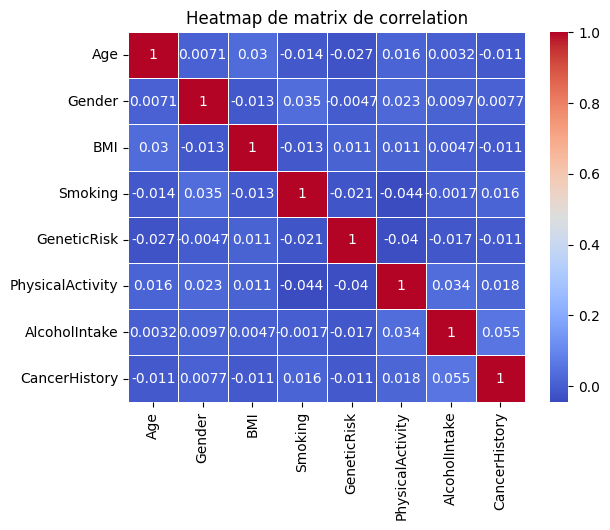

In [116]:
sns.heatmap(cor_matrix,annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Heatmap de matrix de correlation')
plt.show()

In [97]:
df_cible = df[["Diagnosis"]]
df.drop(df_cible.columns, inplace=True, axis=1)
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
0,58,1,16.085313,0,1,8.146251,4.148219,1
1,71,0,30.828784,0,1,9.361630,3.519683,0
2,48,1,38.785084,0,2,5.135179,4.728368,0
3,34,0,30.040296,0,0,9.502792,2.044636,0
4,62,1,35.479721,0,0,5.356890,3.309849,0


In [98]:
print(df.shape)
df_cible['Diagnosis'].unique()

(1500, 8)


array([1, 0], dtype=int64)

In [99]:
x_train,x_test,y_train,y_test=train_test_split(df,df_cible,test_size=0.5,random_state=20)

# Regression Logistique


In [100]:
Logistic_reg= LogisticRegression()
Logistic_reg.fit(x_train,y_train)

c:\Users\jorda\OneDrive\Desktop\MD4\environements\data_env\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jorda\OneDrive\Desktop\MD4\environements\data_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
y_predict= Logistic_reg.predict(x_test)
y_predict_pro=Logistic_reg.predict_proba(x_test)[:,1]

In [102]:
roc= roc_auc_score(y_test, y_predict)
print(roc)
fpr, tpr, thresholds = roc_curve(y_test, y_predict_pro)

0.8246249686999674


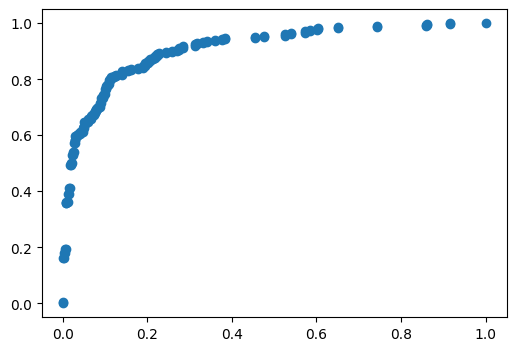

In [103]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, "o")
plt.show()

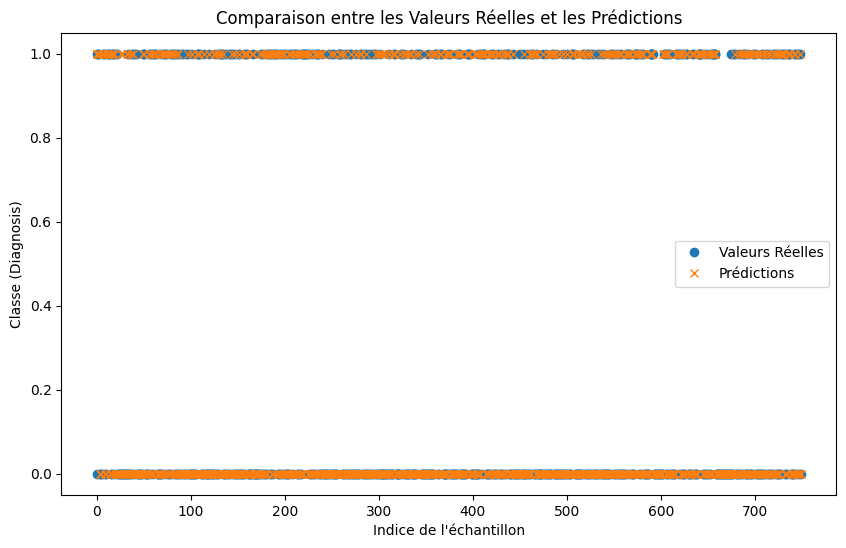

In [104]:
x_values = np.arange(len(y_test))

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_test, marker='o', linestyle='', label='Valeurs Réelles')
plt.plot(x_values, y_predict, marker='x', linestyle='', label='Prédictions')
plt.title('Comparaison entre les Valeurs Réelles et les Prédictions')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Classe (Diagnosis)')
plt.legend()
plt.show()

# KNN

In [105]:
def best_par(df, df_solution):
    k_fold=10
    parameter= {"n_neighbors": [k for k in range (1,40,2)]}

    GridSearchCV_obj = GridSearchCV(neighbors.KNeighborsClassifier(),
                                    parameter,
                                    cv=k_fold,
                                    scoring="accuracy")
    GridSearchCV_obj.fit(df,df_solution)
    print(GridSearchCV_obj.best_params_)
    scores=pd.DataFrame(GridSearchCV_obj.cv_results_)
    return scores

In [110]:
scores= best_par(df,df_cible.values.ravel())

{'n_neighbors': 21}


In [111]:
knn_model= neighbors.KNeighborsClassifier(21)
knn_model.fit(x_train,y_train)

c:\Users\jorda\OneDrive\Desktop\MD4\environements\data_env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=21)

In [112]:
knn_y_pred= knn_model.predict(x_test)

In [113]:
acc= accuracy_score(y_test,knn_y_pred)
print(acc)

0.6693333333333333
